## Neural network regression with tensorflow

In [94]:
import tensorflow as tf
print(tf.__version__)

2.4.1


### creating data to view and fit

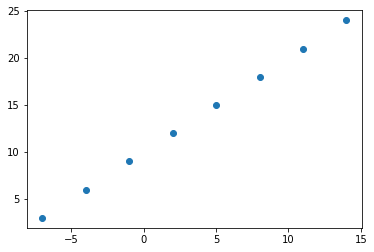

In [95]:
import numpy as np
import matplotlib.pyplot as plt
# create features
x= np.array([-7, -4.0, -1, 2, 5, 8, 11, 14])
y= np.array([3.0, 6, 9, 12, 15, 18, 21, 24])
# Visualize
plt.scatter(x, y);

In [96]:
y== x+10

array([ True,  True,  True,  True,  True,  True,  True,  True])

In [97]:
# Create a demo tensor for our housing price prediction problem
house_info= tf.constant(["bedroom", "bathroom", "garage" ])
house_price= tf.constant([9397000])
house_info, house_price

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([9397000], dtype=int32)>)

In [98]:
input_shape= x.shape
output_shape= y.shape
input_shape, output_shape

((8,), (8,))

In [99]:
x[0].ndim

0

In [100]:
x[0], y[0]

(-7.0, 3.0)

In [101]:
# Turn our numpy array into tensors
x= tf.cast(tf.constant(x), dtype= tf.float32)
y= tf.cast(tf.constant(y), dtype= tf.float32)
x, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [102]:
## Steps in modelling with TensorFlow
tf.random.set_seed(42)# set random seed

#1. Create the model using Sequential API
model= tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])
#2. Compile the model
model.compile(loss= tf.keras.losses.mae,
             optimizer= tf.keras.optimizers.SGD(),
             metrics=['mae'])
#3. Fit the model
model.fit(x, y, epochs= 5)


Epoch 1/5
1/1 [==============================] - 0s 236ms/step - loss: 11.5048 - mae: 11.5048
Epoch 2/5
1/1 [==============================] - 0s 7ms/step - loss: 11.3723 - mae: 11.3723
Epoch 3/5
1/1 [==============================] - 0s 2ms/step - loss: 11.2398 - mae: 11.2398
Epoch 4/5
1/1 [==============================] - 0s 9ms/step - loss: 11.1073 - mae: 11.1073
Epoch 5/5
1/1 [==============================] - 0s 3ms/step - loss: 10.9748 - mae: 10.9748


In [103]:
x, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [104]:
# Try and make a prediction using our model
model.predict([17])

array([[12.716021]], dtype=float32)

### Improving our model

In [105]:
# Rebuilding our model
#1. Create the model
model= tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

#2. Compile the model
model.compile(loss= tf.keras.losses.mae,
              optimizer= tf.keras.optimizers.SGD(),
              metrics= ['mae']
             )

#3. Fit the model: train for longer this time
model.fit(x, y, epochs=100, verbose=0)

In [106]:
x, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [107]:
# See the prediction of our model
model.predict([17.0])

array([[29.739855]], dtype=float32)

In [108]:
# Try making change by adding an extra layer and some other changes
model= tf.keras.Sequential([
    tf.keras.layers.Dense(50, activation=None),
    tf.keras.layers.Dense(1)
])

model.compile(loss= tf.keras.losses.mae,
             optimizer= tf.keras.optimizers.Adam(learning_rate=0.01), 
             metrics=['mae'])
model.fit(x,y, epochs=100, verbose=0)

In [109]:
x, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [110]:
model.predict([17.0])

array([[26.583529]], dtype=float32)

In [111]:
model.predict([-2])

array([[8.104562]], dtype=float32)

In [112]:
## Evaluating a model


In [113]:
## Make a bigger dataset
X= tf.range(-100, 100, 4)
X

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96], dtype=int32)>

In [114]:
# make labels for the dataset
y= X+10
y

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

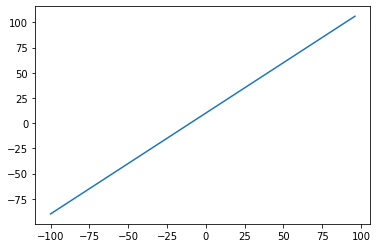

In [115]:
# Visualize the data
plt.plot(X, y)

In [116]:
## Three sets: Training set, cross-validation set, test set
# check the length of how many samples we have
len(X)

50

In [117]:
# Split the data into train and test sets
X_train= X[:40]
y_train= y[:40]

X_test= X[40:]
y_test= y[40:]


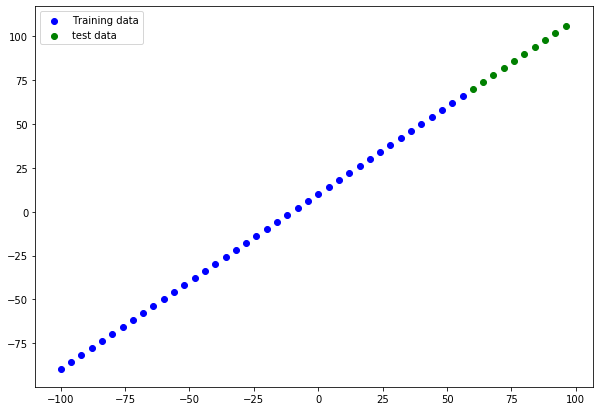

In [118]:
## Visualizing data
plt.figure(figsize=(10, 7))
# Plot training data in blue
plt.scatter(X_train, y_train, c='b', label="Training data")
# Plot test data in green
plt.scatter(X_test, y_test, c='g', label="test data")
plt.legend();

In [119]:
# Create a model
model= tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# Compile a model
model.compile(loss='mae',
             optimizer= tf.keras.optimizers.SGD(),
             metrics=['mae'])

# fit the model
model.fit(X_train, y_train, epochs=100, verbose=0)

#### Visualizing the model

In [120]:
model.summary()

Model: "sequential_20"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_40 (Dense)             (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [121]:
# Create a model which builds automatically by defining the input_shape argument
tf.random.set_seed(42)
# Create a model same as above
model= tf.keras.Sequential([
    tf.keras.layers.Dense(10, input_shape=[1], name='input_layer'),
    tf.keras.layers.Dense((1),name ='output_layer' )
])

# compile the model
model.compile(loss='mae',
             optimizer= tf.keras.optimizers.SGD(), 
             metrics=['mae'])

# Fit the model
#model.fit(X_train, y_train, epochs=100 )
model.summary()

Model: "sequential_21"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (Dense)          (None, 10)                20        
_________________________________________________________________
output_layer (Dense)         (None, 1)                 11        
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


In [122]:
model.fit(X_train, y_train, epochs=100, verbose= 0)

In [123]:
model.summary()

Model: "sequential_21"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (Dense)          (None, 10)                20        
_________________________________________________________________
output_layer (Dense)         (None, 1)                 11        
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


In [124]:
pip install pydotplus


Note: you may need to restart the kernel to use updated packages.


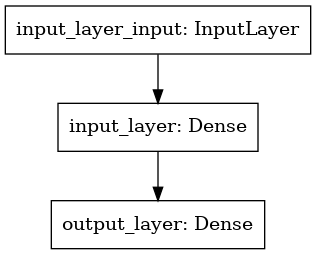

In [125]:
from tensorflow.keras.utils import plot_model
plot_model(model= model)

### Visualizing our model's prediction

In [126]:
# make some predictions
y_pred= model.predict(X_test)
y_pred

array([[ 70.552185],
       [ 75.13991 ],
       [ 79.72764 ],
       [ 84.315346],
       [ 88.90308 ],
       [ 93.49081 ],
       [ 98.07852 ],
       [102.666245],
       [107.253975],
       [111.84169 ]], dtype=float32)

In [127]:
y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

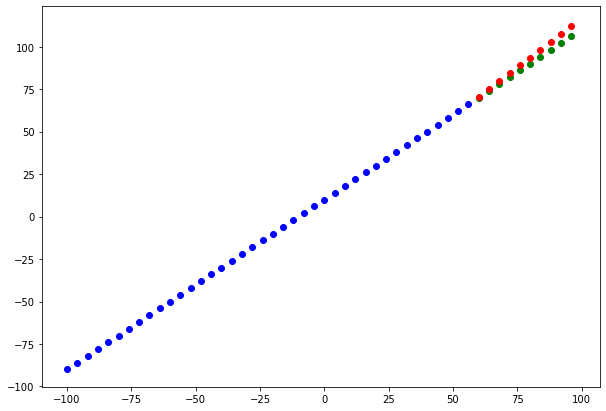

In [128]:
# Let's create a plotting function
def plot_predictions(train_data= X_train,
                    train_labels= y_train, 
                    test_data= X_test,
                    test_labels=y_test,
                    predictions= y_pred):
    plt.figure(figsize=(10, 7))
    # plot training data in blue
    plt.scatter(train_data, train_labels, c='b', label='Training data')
    # plot testing data in green
    plt.scatter(test_data, test_labels, c='g', label='Testing data')
    # plto model's prediction in red
    plt.scatter(test_data, predictions, c='r', label='Prediction')
plot_predictions()

### Evaluating our model's prediction with regression evaluation metrics

In [129]:
# Evaluate the model on the test
model.evaluate(X_test, y_test)

1/1 [==============================] - 0s 148ms/step - loss: 3.1969 - mae: 3.1969


[3.196941375732422, 3.196941375732422]

In [130]:
# Calcualte the mean absolute error
y_pred=tf.squeeze(y_pred)
mae= tf.keras.losses.MAE(y_test, y_pred)
mae

<tf.Tensor: shape=(), dtype=float32, numpy=3.19694>

In [131]:
# Calculate the mean squared error
mse= tf.keras.losses.MSE(y_test, y_pred)
mse

<tf.Tensor: shape=(), dtype=float32, numpy=13.070127>

In [132]:
## Make some functions to reuse MAE and MSE
def mae(y_test, y_pred):
    return tf.keras.losses.MAE(y_test= y_test, y_pred=y_pred)

def mse(y_test=y_test, y_pred=y_pred):
    return tf.metrics.mean_squared_error(y_test= y_test, y_pred=y_pred)

#### Running experiments to improve our model:
1. Get more data
2. Make your model larger(more complex)
3. Train for longer


In [133]:
X_train, y_train

(<tf.Tensor: shape=(40,), dtype=int32, numpy=
 array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
         -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
         -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
          32,   36,   40,   44,   48,   52,   56], dtype=int32)>,
 <tf.Tensor: shape=(40,), dtype=int32, numpy=
 array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
        -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
         14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
         66], dtype=int32)>)

In [134]:
### MOdel 1

tf.random.set_seed(42)
# 1. Create model
model_1= tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_1.compile(loss='mae', 
               optimizer= tf.keras.optimizers.SGD(),
               metrics=['mae'])

#3.  Fit the model
model_1.fit(X_train, y_train, epochs=100, verbose=0)


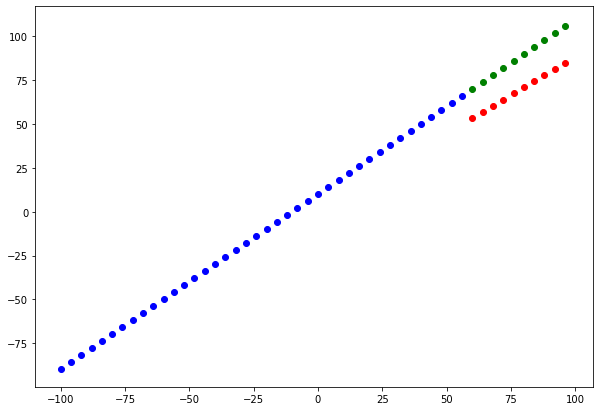

In [135]:
# Make and plot predictions for model_1
y_preds_1= model_1.predict(X_test)
plot_predictions(predictions= y_preds_1)

In [136]:
# Calculate model_1 evaluation metrics
#mae1= mae(y_test, tf.squeeze(y_preds_1))
mse_1=tf.keras.losses.MSE(y_test, tf.squeeze(y_preds_1))
mae_1= tf.keras.losses.MAE(y_test, tf.squeeze(y_preds_1))
#mse1=mse(y_test, tf.squeeze(y_preds_1))
mae_1, mse_1

(<tf.Tensor: shape=(), dtype=float32, numpy=18.745327>,
 <tf.Tensor: shape=(), dtype=float32, numpy=353.57336>)

In [137]:
y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

In [138]:
### Model 2
tf.random.set_seed(42)
#1. build the model
model_2= tf.keras.Sequential([
    tf.keras.layers.Dense(10), 
    tf.keras.layers.Dense(1)
])

#2. Compile the model
model_2.compile(loss='mae',
               optimizer=tf.keras.optimizers.SGD(),
               metrics=['mse'])

# 3. Fit the model
model_2.fit(X_train, y_train, epochs=100, verbose=0)

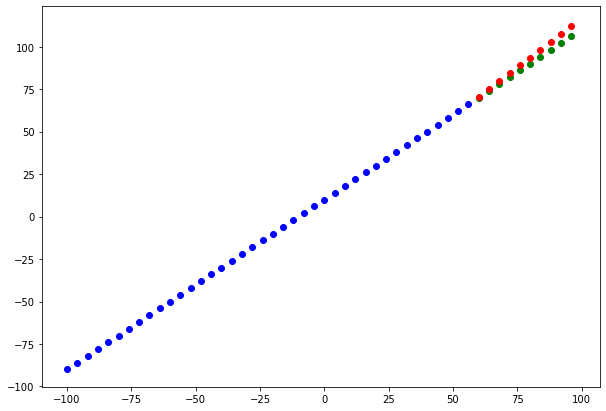

In [139]:
# plot and predict 
y_preds_2= model_2.predict(X_test)
plot_predictions(predictions= y_preds_2)

In [140]:
# Calculate model_2 evaluation metrics
mse_2=tf.keras.losses.MSE(y_test, tf.squeeze(y_preds_2))
mae_2= tf.keras.losses.MAE(y_test, tf.squeeze(y_preds_2))
mae_2, mse_2

(<tf.Tensor: shape=(), dtype=float32, numpy=3.19694>,
 <tf.Tensor: shape=(), dtype=float32, numpy=13.070127>)

In [141]:
### Model 3
model_3= tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

model_3.compile(loss='mae',
               optimizer= tf.keras.optimizers.Adam(),
               metrics=['mae'])

model_3.fit(X_train, y_train, epochs=500, verbose=0)

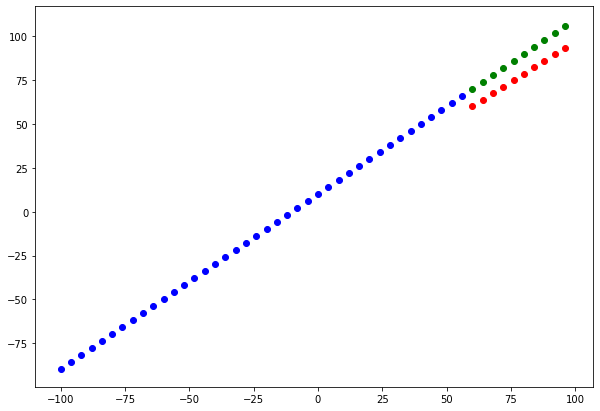

In [142]:
## Make and plot our predictions
y_preds_3= tf.squeeze(model_3.predict(X_test))
plot_predictions(predictions= y_preds_3)

In [143]:
## Calculate evaluation metrics for model_3
mse_3=tf.keras.losses.MSE(y_test, tf.squeeze(y_preds_3))
mae_3= tf.keras.losses.MAE(y_test, tf.squeeze(y_preds_3))
mae_3, mse_3


(<tf.Tensor: shape=(), dtype=float32, numpy=11.197301>,
 <tf.Tensor: shape=(), dtype=float32, numpy=126.09265>)

In [144]:
## Comparing the results of our experiments using panda's DataFrame
import pandas as pd
model_results= [['model_1',mae_1.numpy(), mse_1.numpy()],
               ['model_2', mae_2.numpy(), mse_2.numpy()],
               ['model_3', mae_3.numpy(), mse_3.numpy()]]

all_results= pd.DataFrame(model_results, columns=['model', 'mae','mse'] )
all_results


,model,mae,mse
0,model_1,18.745327,353.573364
1,model_2,3.196940,13.070127
2,model_3,11.197301,126.092651


### Saving our models

#### There are two main formats for saving our model:
1. The saved model format 
2. The HDF5 format

In [145]:
# Save model using the saved model format
model_2.save("Best_model_Savedmodel_format")

INFO:tensorflow:Assets written to: Best_model_Savedmodel_format/assets


In [146]:
# save model using HDF5 format
model_2.save("Best_model_HDF5_format.h5")

### Loading in a saved model

In [147]:
# Load in the saved model format model
loaded_savedmodel_format= tf.keras.models.load_model("Best_model_Savedmodel_format")
loaded_savedmodel_format.summary()

Model: "sequential_23"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_42 (Dense)             (None, 10)                20        
_________________________________________________________________
dense_43 (Dense)             (None, 1)                 11        
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


In [148]:
model_2.summary()

Model: "sequential_23"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_42 (Dense)             (None, 10)                20        
_________________________________________________________________
dense_43 (Dense)             (None, 1)                 11        
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


In [149]:
# Compare model_2 predictions with the loaded_savedmodel_format predictions
model_2_preds= model_2.predict(X_test)
loaded_savedmodel_preds= loaded_savedmodel_format.predict(X_test)
model_2_preds== loaded_savedmodel_preds

array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True]])

In [150]:
tf.keras.losses.MAE(y_test, tf.squeeze(model_2_preds)) == tf.keras.losses.MAE(y_test, tf.squeeze(loaded_savedmodel_preds))
#mae(y_test, y_pred=model_2_preds)== mae(y_test, y_pred=loaded_savedmodel_preds)

<tf.Tensor: shape=(), dtype=bool, numpy=True>

In [151]:
# Load in a model using .h5 format
loaded_h5_model= tf.keras.models.load_model("Best_model_HDF5_format.h5")
loaded_h5_model.summary()

Model: "sequential_23"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_42 (Dense)             (None, 10)                20        
_________________________________________________________________
dense_43 (Dense)             (None, 1)                 11        
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


In [152]:
loaded_h5_model.predict(X_test)== model_2.predict(X_test)

array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True]])

### A larger example

In [153]:
X_train, y_train

(<tf.Tensor: shape=(40,), dtype=int32, numpy=
 array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
         -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
         -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
          32,   36,   40,   44,   48,   52,   56], dtype=int32)>,
 <tf.Tensor: shape=(40,), dtype=int32, numpy=
 array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
        -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
         14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
         66], dtype=int32)>)

In [154]:
# Import required libraries
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt


In [155]:
# Read in the insurance dataset
insurance = pd.read_csv('https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv')
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [156]:
insurance['sex']

0       female
1         male
2         male
3         male
4         male
         ...  
1333      male
1334    female
1335    female
1336    female
1337    female
Name: sex, Length: 1338, dtype: object

In [157]:
# One-hot encoding our dataframe 
insurance_one_hot= pd.get_dummies(insurance)
insurance_one_hot.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0


In [158]:
# Creating features and labels
X= insurance_one_hot.drop(['charges'], axis=1)
y= insurance_one_hot['charges']
X.head()

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,1,0,0,1,0,0,0,1
1,18,33.770,1,0,1,1,0,0,0,1,0
2,28,33.000,3,0,1,1,0,0,0,1,0
3,33,22.705,0,0,1,1,0,0,1,0,0
4,32,28.880,0,0,1,1,0,0,1,0,0


In [159]:
y.head()

0    16884.92400
1     1725.55230
2     4449.46200
3    21984.47061
4     3866.85520
Name: charges, dtype: float64

In [160]:
# Splitting training and testing data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size= 0.2, random_state=42)
len(X), len(X_train), len(X_test)

(1338, 1070, 268)

In [161]:
# Build a neural network
tf.random.set_seed(42)

insurance_model= tf.keras.Sequential([
    tf.keras.layers.Dense(64),
    tf.keras.layers.Dense(64),
    tf.keras.layers.Dense(1)
    
])

insurance_model.compile(loss='mae',
                       optimizer= tf.keras.optimizers.Adam(),
                       metrics=['mae'])

insurance_model.fit(X_train, y_train, epochs= 100, verbose=0)

In [162]:
# Check the result of the insurance model on the test data
insurance_model.evaluate(X_test, y_test)

9/9 [==============================] - 0s 1ms/step - loss: 3648.4460 - mae: 3648.4460


[3648.446044921875, 3648.446044921875]

In [163]:
# Try to improve our model
tf.random.set_seed(42)

# 1. Create the model
insurance_model_2= tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
insurance_model_2.compile(loss='mae',
                         optimizer= tf.keras.optimizers.Adam(),
                         metrics= ['mae'])

# 3. Fit the model
insurance_model_2.fit(X_train, y_train, epochs=100, verbose=0)


In [75]:
insurance_model_2.evaluate(X_train, y_train)

34/34 [==============================] - 0s 1ms/step - loss: 3672.7251 - mae: 3672.7251


[3672.72509765625, 3672.72509765625]

In [76]:
insurance_model.evaluate(X_train, y_train)

34/34 [==============================] - 0s 946us/step - loss: 3786.6899 - mae: 3786.6899


[3786.68994140625, 3786.68994140625]

In [89]:
tf.random.set_seed(42)
# Third  model by increasing the number of epochs
insurance_model_3= tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

insurance_model_3.compile(loss='mae',
                         optimizer= tf.keras.optimizers.Adam(),
                         metrics=['mae'])

history= insurance_model_3.fit(X_train, y_train, epochs=200, verbose=0)

In [86]:
insurance_model_3.evaluate(X_test, y_test)

9/9 [==============================] - 0s 1ms/step - loss: 3488.7859 - mae: 3488.7859


[3488.785888671875, 3488.785888671875]

In [87]:
insurance_model.evaluate(X_test, y_test)

9/9 [==============================] - 0s 2ms/step - loss: 3648.4460 - mae: 3648.4460


[3648.446044921875, 3648.446044921875]

In [88]:
insurance_model_2.evaluate(X_test, y_test)

9/9 [==============================] - 0s 1ms/step - loss: 3505.1694 - mae: 3505.1694


[3505.16943359375, 3505.16943359375]

Text(0.5, 0, 'epochs')

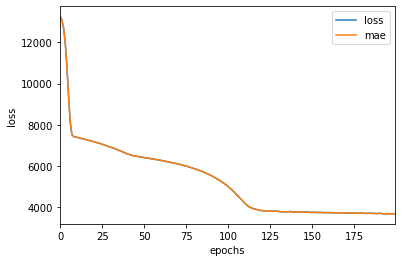

In [90]:
# Plot history( also known as a loss curve or a training curve)
pd.DataFrame(history.history).plot()
plt.ylabel('loss')
plt.xlabel('epochs')